# Day 09. Exercise 00
# Regularization

## 0. Imports

In [4]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

## 1. Preprocessing

1. Read the file `dayofweek.csv` that you used in the previous day to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [7]:
df = pd.read_csv('data/dayofweek.csv')
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,5,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3,5,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,5,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,5,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1682,6,20,3,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1683,7,20,3,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1684,8,20,3,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [8]:
x = df.drop('dayofweek', axis=1)
y = df['dayofweek']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21, stratify=y)

## 2. Logreg regularization

### a. Default regularization

1. Train a baseline model with the only parameters `random_state=21`, `fit_intercept=False`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model


The result of the code where you trained and evaluated the baseline model should be exactly like this (use `%%time` to get the info about how long it took to run the cell):

```
train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
```

In [17]:
lr = LogisticRegression(fit_intercept=False, random_state=21, solver='liblinear')

In [19]:
def crossval(estimator, X, y, n_splits=10):
    train_scores = []
    valid_scores = []
    cv = StratifiedKFold(n_splits=n_splits)
    for train, valid in cv.split(X, y):
        estimator.fit(X.iloc[train], y.iloc[train])
        y_train_pred = estimator.predict(X.iloc[train])
        y_valid_pred = estimator.predict(X.iloc[valid])
        train_scores.append(accuracy_score(y.iloc[train], y_train_pred))
        valid_scores.append(accuracy_score(y.iloc[valid], y_valid_pred))
    for i in range(len(train_scores)):
        print(f'train -  {train_scores[i]:.5f}   |   valid -  {valid_scores[i]:.5f}')
    print(f'Average accuracy on crossval is {np.mean(valid_scores):.5f}')
    print(f'Std is {np.std(valid_scores):.5f}')

In [21]:
%%time
crossval(lr, X_train, y_train)

train -  0.61088   |   valid -  0.54815
train -  0.61913   |   valid -  0.61481
train -  0.61418   |   valid -  0.60000
train -  0.62902   |   valid -  0.59259
train -  0.61830   |   valid -  0.56296
train -  0.61583   |   valid -  0.60000
train -  0.60594   |   valid -  0.62963
train -  0.63397   |   valid -  0.57778
train -  0.61779   |   valid -  0.58209
train -  0.61532   |   valid -  0.61940
Average accuracy on crossval is 0.59274
Std is 0.02424
CPU times: total: 234 ms
Wall time: 441 ms


### b. Optimizing regularization parameters

1. In the cells below try different values of penalty: `none`, `l1`, `l2` – you can change the values of solver too.

In [25]:
param_grid = [
              {'solver': ['liblinear', 'saga'], 'penalty': ['l1', 'l2']},
              {'solver': ['saga'], 'penalty': ['l1', 'l2', None]},
              {'solver': ['newton-cg', 'lbfgs', 'sag'], 'penalty': ['l2', None]}]

gs = GridSearchCV(lr, param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(fit_intercept=False, random_state=21,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid=[{'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']},
                         {'penalty': ['l1', 'l2', None], 'solver': ['saga']},
                         {'penalty': ['l2', None],
                          'solver': ['newton-cg', 'lbfgs', 'sag']}],
             scoring='accuracy')

In [26]:
gs.best_params_

{'penalty': None, 'solver': 'newton-cg'}

In [27]:
gs.best_score_

0.629844416907614

## 3. SVM regularization

### a. Default regularization

1. Train a baseline model with the only parameters `probability=True`, `kernel='linear'`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [34]:
svc = SVC(kernel='linear', probability=True, random_state=21)

In [33]:
%%time
crossval(svc, X_train, y_train)

train -  0.70816   |   valid -  0.65185
train -  0.69580   |   valid -  0.74815
train -  0.69662   |   valid -  0.61481
train -  0.70486   |   valid -  0.65185
train -  0.69497   |   valid -  0.66667
train -  0.69085   |   valid -  0.65185
train -  0.69415   |   valid -  0.72593
train -  0.69909   |   valid -  0.62963
train -  0.69934   |   valid -  0.63433
train -  0.71087   |   valid -  0.63433
Average accuracy on crossval is 0.66094
Std is 0.04078
CPU times: total: 3min 41s
Wall time: 4min 4s


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `C`.

In [36]:
param_grid = {'C': [0.01, 0.1, 1, 10],
               'kernel': ['linear'],
              'probability': [True], 
                'random_state': [21]}  
gs = GridSearchCV(svc, param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(kernel='linear', probability=True, random_state=21),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['linear'],
                         'probability': [True], 'random_state': [21]},
             scoring='accuracy')

In [37]:
gs.best_params_

{'C': 10, 'kernel': 'linear', 'probability': True, 'random_state': 21}

In [38]:
gs.best_score_

0.7195869475423379

## 4. Tree

### a. Default regularization

1. Train a baseline model with the only parameter `max_depth=10` and `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [51]:
dtc = DecisionTreeClassifier(max_depth=10, random_state=21)

In [53]:
%%time
crossval(dtc, X_train, y_train)

train -  0.81039   |   valid -  0.74074
train -  0.77741   |   valid -  0.74815
train -  0.83347   |   valid -  0.71111
train -  0.79720   |   valid -  0.75556
train -  0.82440   |   valid -  0.75556
train -  0.80379   |   valid -  0.68889
train -  0.80709   |   valid -  0.76296
train -  0.80132   |   valid -  0.65185
train -  0.80807   |   valid -  0.76119
train -  0.80478   |   valid -  0.68657
Average accuracy on crossval is 0.72626
Std is 0.03703
CPU times: total: 172 ms
Wall time: 291 ms


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `max_depth`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [55]:
param_grid = {'splitter': ['best', 'random'],
              'max_depth': np.arange(2, 25)}
gs = GridSearchCV(dtc, param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10, random_state=21),
             n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [56]:
gs.best_params_

{'max_depth': 21, 'splitter': 'random'}

In [59]:
gs.best_score_

0.8716590940382762

## 5. Random forest

### a. Default regularization

1. Train a baseline model with the only parameters `n_estimators=50`, `max_depth=14`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [61]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=14, random_state=21)

In [63]:
%%time
crossval(rfc, X_train, y_train)

train -  0.96455   |   valid -  0.86667
train -  0.96208   |   valid -  0.91111
train -  0.96785   |   valid -  0.86667
train -  0.96455   |   valid -  0.89630
train -  0.96538   |   valid -  0.91111
train -  0.96538   |   valid -  0.88148
train -  0.97115   |   valid -  0.91852
train -  0.96867   |   valid -  0.85185
train -  0.97446   |   valid -  0.88060
train -  0.98023   |   valid -  0.86567
Average accuracy on crossval is 0.88500
Std is 0.02189
CPU times: total: 1.02 s
Wall time: 1.47 s


### b. Optimizing regularization parameters

1. In the new cells try different values of the parameters `max_depth` and `n_estimators`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [90]:
param_grid = {'max_features': [None, 'sqrt', 'log2'],
              'max_depth': [15, 20, 25, 30],
              'n_estimators': [50, 100, 150]}
gs = GridSearchCV(rfc, param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=14, n_estimators=50,
                                              random_state=21),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [75]:
gs.best_params_

{'max_depth': 30, 'max_features': 'log2', 'n_estimators': 150}

In [76]:
gs.best_score_

0.9035494974528433

## 6. Predictions

1. Choose the best model and use it to make predictions for the test dataset.
2. Calculate the final accuracy.
3. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your test dataset).
4. Save the model.

In [79]:
y_pred = gs.best_estimator_.predict(X_test)

In [80]:
accuracy_score(y_test, y_pred)

0.9349112426035503

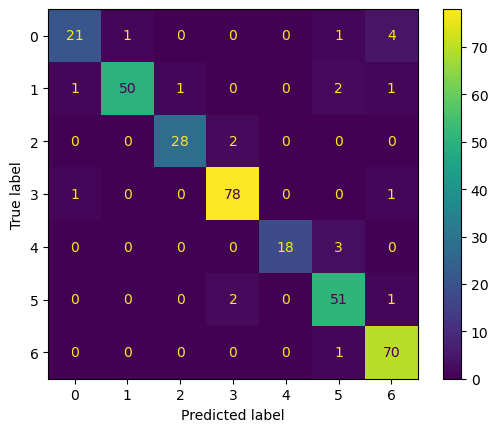

In [81]:
ConfusionMatrixDisplay.from_estimator(gs.best_estimator_, X_test, y_test)

In [82]:
joblib.dump(gs.best_estimator_, 'data/model.joblib')

['data/model.joblib']